In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


# Data Loading and Preprocessing

In [2]:
# Loads the training and test data sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
first_image = X_train[0, :, :]

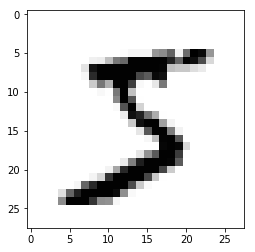

In [4]:
# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
plt.imshow(first_image, cmap=plt.cm.Greys);

In [5]:
num_classes = len(np.unique(y_train))
num_classes

10

In [6]:
# 60K training 28 x 28 (pixel) images
X_train.shape

(60000, 28, 28)

In [7]:
# 10K test 28 x 28 (pixel) images
X_test.shape

(10000, 28, 28)

In [8]:
input_dim = np.prod(X_train.shape[1:])
input_dim

784

In [9]:
# The training and test data sets are integers, ranging from 0 to 255.
# We reshape the training and test data sets to be matrices with 784 (= 28 * 28) features.
X_train = X_train.reshape(60000, input_dim).astype('float32')
X_test = X_test.reshape(10000, input_dim).astype('float32')

In [10]:
# Scales the training and test data to range between 0 and 1.
max_value = X_train.max()
X_train /= max_value
X_test /= max_value

In [11]:
# The training and test labels are integers from 0 to 9 indicating the class label
(y_train, y_test)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [12]:
# We convert the class labels to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Multilayer Perceptron

In this example, we increase the depth of the network to have **two hidden layers**.

We also apply **dropout**, which is a regularization technique that randomly drops a percentage of the nodes (neurons) in the network.

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

## Different Ways to Summarize Model

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


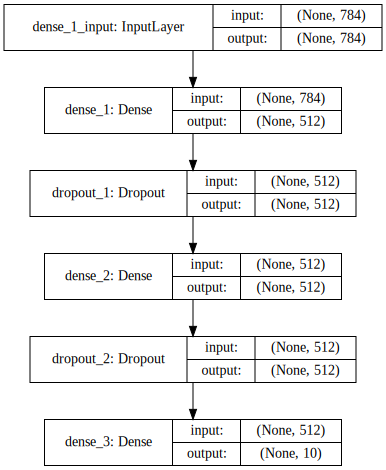

In [15]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [16]:
import json
json.loads(model.to_json())

{u'backend': u'tensorflow',
 u'class_name': u'Sequential',
 u'config': [{u'class_name': u'Dense',
   u'config': {u'activation': u'relu',
    u'activity_regularizer': None,
    u'batch_input_shape': [None, 784],
    u'bias_constraint': None,
    u'bias_initializer': {u'class_name': u'Zeros', u'config': {}},
    u'bias_regularizer': None,
    u'dtype': u'float32',
    u'kernel_constraint': None,
    u'kernel_initializer': {u'class_name': u'VarianceScaling',
     u'config': {u'distribution': u'uniform',
      u'mode': u'fan_avg',
      u'scale': 1.0,
      u'seed': None}},
    u'kernel_regularizer': None,
    u'name': u'dense_1',
    u'trainable': True,
    u'units': 512,
    u'use_bias': True}},
  {u'class_name': u'Dropout',
   u'config': {u'name': u'dropout_1', u'rate': 0.3, u'trainable': True}},
  {u'class_name': u'Dense',
   u'config': {u'activation': u'relu',
    u'activity_regularizer': None,
    u'bias_constraint': None,
    u'bias_initializer': {u'class_name': u'Zeros', u'config':

## Train Classifier

In [17]:
# Trains the model, iterating on the training data in batches of 32 in 3 epochs.
# Using the Adam optimizer.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

Epoch 1/3
60000/60000 [==============================] - 36s - loss: 0.2418 - acc: 0.9259    
Epoch 2/3
60000/60000 [==============================] - 38s - loss: 0.1226 - acc: 0.9621    
Epoch 3/3
60000/60000 [==============================] - 37s - loss: 0.1026 - acc: 0.9695    


## Model Evaluation

In [18]:
# Test accuracy is ~98%.
model.evaluate(X_test, y_test)

 9888/10000 [============================>.] - ETA: 0s

[0.078851907466677945, 0.97670000000000001]

## Predicting a Couple of Held-Out Images

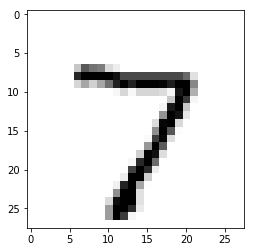

In [19]:
first_test_image = X_test[0, :]
plt.imshow(first_test_image.reshape(28, 28), cmap=plt.cm.Greys);

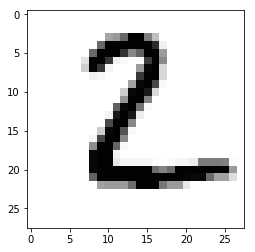

In [20]:
second_test_image = X_test[1, :]
plt.imshow(second_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [21]:
model.predict_classes(X_test[[0, 1], :])

2/2 [==============================] - 0s


array([7, 2])